# Pythonによる統計分析の基本1

## 分析の準備

In [18]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pmdarima as pm

# グラフ描画のライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## 1変量データの分析

In [4]:
# データの読み込み
df1 = pd.read_csv("sample_data/2-3-1-sample-data-1.csv")
df1.head()

,x
0,14.873
1,8.165
2,8.415
3,6.781
4,12.596


In [5]:
# 統計量の計算
print(df1.describe())

               x
count  30.000000
mean    9.820100
std     3.079053
min     3.095000
25%     7.774250
50%     9.367500
75%    12.384000
max    15.234000


<Axes: xlabel='x', ylabel='Count'>

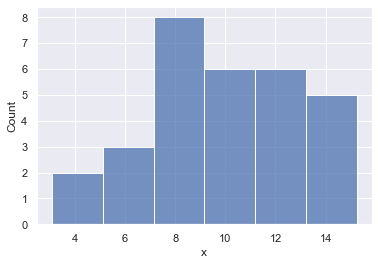

In [6]:
# ヒストグラム
sns.histplot(df1["x"])

### 平均値の区間推定

In [7]:
# 平均値の区間推定
dsw1 = sm.stats.DescrStatsW(df1['x'])
print('標本平均', round(dsw1.mean, 3))
print('標準偏差', round(dsw1.std, 3))
print('標準誤差', round(dsw1.std_mean, 3))
print('95％区間', np.round(dsw1.tconfint_mean(alpha=0.05), 3))

標本平均 9.82
標準偏差 3.027
標準誤差 0.562
95％区間 [ 8.67 10.97]


### 平均値の区間推定

母平均が10と異なるかどうかを検定するために、母平均に対する１標本のt検定を実施する。そのためvalue=10とする。この時の出力順番は、t値/p値/dfとなり、今回はp値が0.75ほどであり、0.05を上回ったため、有意水準5%では帰無仮説を棄却できない結果に。

→ 【検定結果】**母平均が10とは異なるとはいえない。**

In [15]:
# t値、p値、dfが出力される
np.round(dsw1.ttest_mean(value=10, alternative='two-sided'), 3)

array([-0.32 ,  0.751, 29.   ])

- 両側検定の場合：alternativ='two-sided'
- 片側検定の場合：alternativ='larger'　/　alternativ='smaller'

In [17]:
# 参考：片側検定
print(np.round(dsw1.ttest_mean(value=10, alternative='larger'), 3))
print(np.round(dsw1.ttest_mean(value=10, alternative='smaller'), 3))

[-0.32   0.624 29.   ]
[-0.32   0.376 29.   ]


In [12]:
# 3行プログラミング
df1 = pd.read_csv("sample_data/2-3-1-sample-data-1.csv")
dsw1 = sm.stats.DescrStatsW(df1['x'])
np.round(dsw1.ttest_mean(value=10, alternative='two-sided'), 3)

array([-0.32 ,  0.751, 29.   ])